# Squared numbers

In [2]:
N = 1000000
%timeit [i**2 for i in range(1000000)]

import numpy as np
x = np.arange(N)
%timeit x**2

186 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
688 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
x**2

array([           0,            1,            4, ..., 999994000009,
       999996000004, 999998000001])

In [4]:
x.dtype

dtype('int64')

In [8]:
x = np.arange(N, dtype='int32')
%timeit x**2
print(x**2)

184 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[         0          1          4 ... -733379959 -731379964 -729379967]


## 1.2 Calculation of pi

In [11]:
k = np.arange(30)

np.sum((-1)**k/(3**k * (2*k+1)))*np.sqrt(12)

3.1415926535897936

## 1.3 Allan variance

In [27]:
N = 1000000
y = np.random.normal(size=N)

def simple_allan_variance(y):
    delta_y = y[1:] - y[:-1]
    return np.mean(delta_y**2)/2

In [26]:
def average_frequency(data, n):
    if len(data)%n!=0:
        data = data[len(data)%n:]
    N = len(data)
    data = data.reshape(N//n, n)
    return data.mean(axis=1)
    
average_frequency(np.arange(10), 2)

array([0.5, 2.5, 4.5, 6.5, 8.5])

In [28]:
def AllanVariance(data, n):
    data_mean = average_frequency(data, n)
    return simple_allan_variance(data_mean)

In [29]:
AllanVariance(y, 10)

0.10030750319045134

## 1.4 Mandelbrot

In [49]:
def mandel_simple(c, N=256):
    z = 0
    for i in range(N):
        z = z**2 + c
        if np.abs(z)>2:
            return i
    return 0

mandel_simple(.5+.5J)

import numba

mandel = numba.vectorize(mandel_simple)

In [51]:
x = np.linspace(-2.13, 0.77, 201)
y = np.linspace(-1.13, 1.13, 201)

X, Y = np.meshgrid(x, y)

c = X + 1J*Y

res = mandel(c, 100)

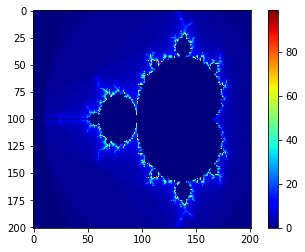

In [52]:
import matplotlib.pyplot as plt

plt.imshow(res, cmap='jet')
plt.colorbar()

In [54]:
%time mandel(c, 100)

CPU times: user 12.3 ms, sys: 5 µs, total: 12.3 ms
Wall time: 10.7 ms


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [55]:
import os

for filename in os.listdir('.'):
    my array = data_analysis(filename)
    np.save('arrays/'+filename[:-3]+'.npy', my_array)

['.~lock.my_array.txt#',
 'data.csv',
 'large_file.txt',
 'exo_numpy.ipynb',
 'Numpy.ipynb',
 'my_array.txt',
 '.~lock.data.csv#',
 'Graphics.ipynb',
 'my_graph.pdf',
 'Scipy.ipynb',
 '.ipynb_checkpoints',
 'large_file.npy',
 'beyond_numpy.ipynb',
 'my_graph.svg']